# Assembly Completeness Analysis

This Jupyter Notebook is dedicated to the analysis of assembly completeness of genomes of organisms. The main objective is to visualize and compare the assembly completeness in different datasets using a bar chart.

## Libraries Used
The notebook uses the following Python libraries for data analysis and visualization:
- Pandas for tabular data manipulation.
- Matplotlib and Seaborn for creating charts.
- NumPy for mathematical operations.
- Os for file and directory management.
- Json for loading JSON files.

## Initial Configurations
Before proceeding with the analysis, some initial configurations have been made, including setting the format for inline chart display and specifying the filename for saving the chart.

- Chart filename: filename
- Organism under examination: organism
- Destination folder path for charts: path

## Data Loading
The data required for analysis is contained in JSON files, and these data are loaded and analyzed in the notebook. The paths to JSON files were obtained by iterating through directories within the specified path.


#### Define the barplot table

In [110]:
#Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import os
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

def graph_busco_barplot(df: pd.DataFrame, out_path, filename):
        
        # Impostazione del font e della dimensione del testo

        # organism = df['organism'].iloc[0]
        group = df['group'].iloc[0]
        dataset_name = df['dataset_name'].iloc[0]
        species_names = []

        for organism in df['organism'].unique():
            species_names = species_names + [organism + '_' + i for i in df[df['organism'] == organism]['version']]

        #species_names = df['version'].tolist()
        matrix = df[['single copy', 'multi copy', 'fragmented', 'missing']].to_numpy()
        one_line_summaries = df['one_line_summary'].to_list()

        # Impostazione dello stile di Seaborn
        sns.set(style="whitegrid")
        colori = ['#49a34b', '#636633', '#664f33', '#4b5669']
        labels = ['Complete - single', 'Complete - multi', 'Fragmented', 'Missing']
        busco_labels = ['Single copy', 'Multi copy', 'Fragmented', 'Missing']

        # Personalizzazione della matrice
        
        values_matrix = matrix.copy()

        for row in range(len(values_matrix)):
            for col in range(len(values_matrix[row])):
                if col != 0:
                    values_matrix[row][col] = values_matrix[row][col-1] + values_matrix[row][col]

        values_matrix = values_matrix.T

        # Creazione del grafico
        fig, axs = plt.subplots(figsize=(20, len(species_names)+1), ncols=1, nrows=1)
        
        # Creazione delle singole barre con colori diversi
        for idx, label in enumerate(labels):
            sns.barplot(x=values_matrix[-idx-1], color=colori[-idx-1], y=species_names, ax=axs, errorbar=None, alpha=0.99)
        
        # Inserimento di una stringa di testo in ognuna delle barre

        for i in range(len(one_line_summaries)):
            axs.text(0.9, i+0.1, str(one_line_summaries[i]), color='white', fontsize=15)
            
        axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
        # Personalizzazione dell'asse x, y e degli spazi dei ticks
        axs.set_xlabel('Percentage', fontsize=18)
        axs.set_ylabel('Organism', fontsize=18)
        axs.set_title(dataset_name + ' ' + group + ' - Barplot of completeness of assembly', fontsize=20, weight='bold', pad=30)
        axs.tick_params(labelsize=15)

        # Set the x-axis limits
        axs.set_xlim(0, 100)

        # Rimozione dei bordi del grafico
        sns.despine(top=True, right=True, left=True, bottom=True)

        # Rimozione dei ticks dell'asse y
        axs.tick_params(axis='y', length=0)

        # Legenda
        patches_list = [Patch(color=colori[i], label=labels[i], alpha=0.75) for i in range(len(labels))]
        axs.legend(handles=patches_list, bbox_to_anchor=(-0.5, 1), fontsize=15)

        #plt.tight_layout()

        # Create the values table
        '''
        table_data = [["Species"] + busco_labels]

        for row, species in zip(matrix, species_names):
            table_data.append([species] + [str(i) + '%' for i in row])

        table = axs[1].table(cellText=table_data, loc='center')

        table.set_fontsize(34)
        table.scale(1, 2)
        table.auto_set_column_width(col=range(len(table_data)))
        axs[1].set_title("Percentage table", weight='bold', size=15)

        for (row, col), cell in table.get_celld().items():
            if (row == 0) or (col == -1):
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
        axs[1].axis('off')
        '''
        plt.savefig(out_path + filename + '_completeness.png', bbox_inches='tight', dpi=300)
        plt.show()

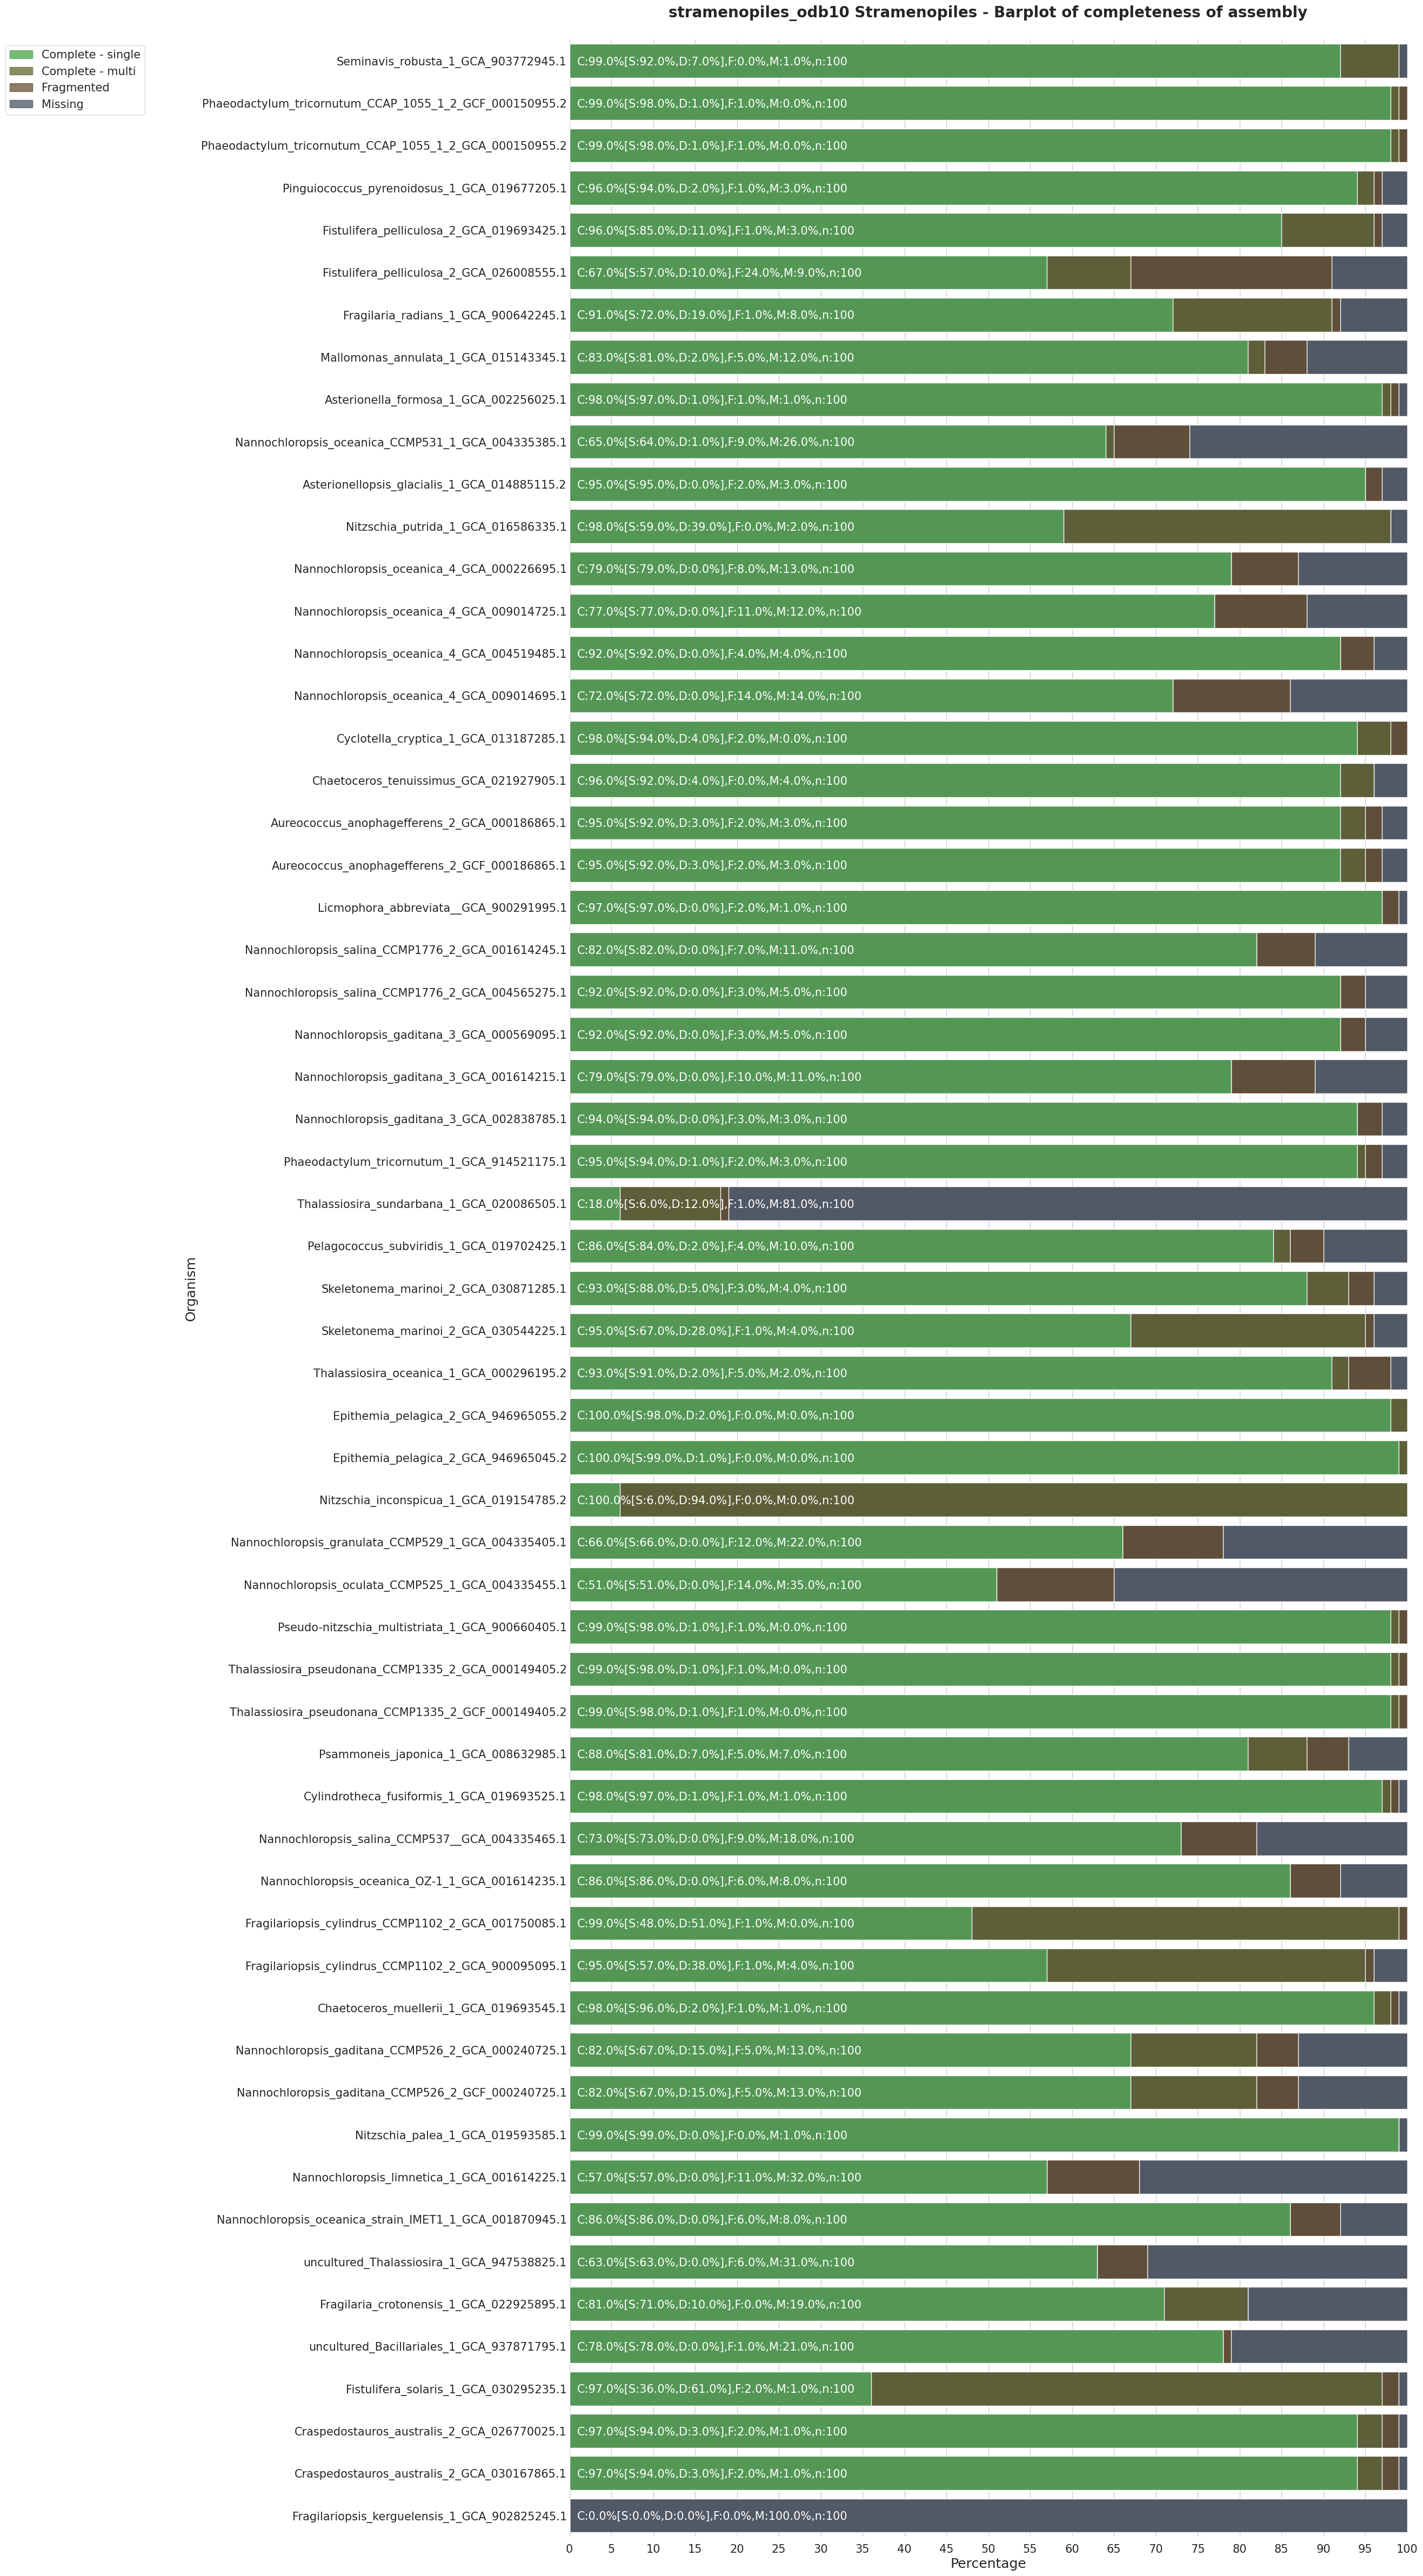

In [114]:
df = summary_data[(summary_data['group'] == 'Stramenopiles')]
outpath = '/home/lorenzo/Documenti/microalghe/'
filename = 'Stramenopiles_busco_barplot'

graph_busco_barplot(df, outpath, filename)

#### Save the complete summary table in csv file

In [3]:
summary_data[summary_data['organism'] == 'Yamagishiella_unicocca_2']

,id,group,organism,version,max_intron,max_seq_len,metaeuk_parameters,metaeuk_rerun_parameters,contig_break,scaffold_composition,...,fragmented,missing,n_markers,domain,number_of_scaffolds,number_of_contigs,total length,percent gaps,scaffold N50,contigs N50
2,3,Chlorophyta,Yamagishiella_unicocca_2,GCA_003116995.1,90000,120000,,,10,False,...,0.9,0.8,1519,eukaryota,1461,1461,134234618,0.000%,666310,666310
3,4,Chlorophyta,Yamagishiella_unicocca_2,GCA_003117035.1,90000,120000,,,10,False,...,1.0,0.7,1519,eukaryota,1897,1897,140837241,0.000%,543037,543037


In [3]:
# Importing libraries

import pandas as pd
import os
import json
import re

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Input directory
dir = "/home/lorenzo/Documenti/microalghe/"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

summary_features = [
    'id',
    'group',
    'organism',
    'version',
    'max_intron',
    'max_seq_len',
    'metaeuk_parameters',
    'metaeuk_rerun_parameters',
    'contig_break',
    'scaffold_composition',
    'gene_predictor',
    'dataset_name',
    'number_of_buscos',
    'number_of_species',
    'metaeuk_version',
    'bbtools_version',
    'busco_version',
    'hmmsearch_version',
    'one_line_summary',
    'complete',
    'single copy',
    'multi copy',
    'fragmented',
    'missing',
    'n_markers',
    'domain',
    'number_of_scaffolds',
    'number_of_contigs',
    'total length',
    'percent gaps',
    'scaffold N50',
    'contigs N50',
]

full_table_features = [
        'group',
        'organism',
        'genome_version',
        'busco_id',
        'status',
        'sequence',
        'gene_start',
        'gene_end',
        'strand',
        'score',
        'length',
        'ortho_db_url',
        'description',
]

def load_full_table(group, organism, genome_version, cwd):
    
    full_table = pd.DataFrame(columns=full_table_features)

    busco_table = pd.read_csv('./full_table.tsv', skiprows=2, sep='\t')

    full_table['busco_id'] = busco_table['# Busco id']
    full_table['status'] = busco_table['Status']
    full_table['sequence'] = busco_table['Sequence']
    full_table['gene_start'] = busco_table['Gene Start']
    full_table['gene_end'] = busco_table['Gene End']
    full_table['strand'] = busco_table['Strand']
    full_table['score'] = busco_table['Score']
    full_table['length'] = busco_table['Length']
    full_table['group'] = group
    full_table['organism'] = organism
    full_table['genome_version'] = genome_version

    try:
        full_table['ortho_db_url'] = busco_table['OrthoDB url']
    except:
        full_table['ortho_db_url'] = None
    
    try:
        full_table['description'] = busco_table['Description']
    except:
        full_table['description'] = None

    return full_table

i = 1

busco_run_pattern = r"run*"

summary_data = pd.DataFrame(columns=summary_features)
fulltable_data = pd.DataFrame(columns=full_table_features)

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + group)

    # Iterate on each organism
    for organism in os.listdir():

        os.chdir(organism)

        # Iterate on each genome version
        for genome_version in os.listdir():

            os.chdir(genome_version)
            os.chdir('./busco_out')

            dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

            os.chdir(dirs[0])

            for file in os.listdir():
                if file.endswith(".json"):
                    with open(file, "r") as f:
                        dict = json.load(f)

                        summary_data.loc[len(summary_data)] = {
                            'id': i,
                            'group': group,
                            'organism': organism,
                            'version': genome_version,
                            'max_intron': dict['parameters']['max_intron'],
                            'max_seq_len': dict['parameters']['max_seq_len'],
                            'metaeuk_parameters': dict['parameters']['metaeuk_parameters'],
                            "metaeuk_rerun_parameters": dict['parameters']['metaeuk_rerun_parameters'],
                            "contig_break": dict['parameters']['contig_break'],
                            "scaffold_composition": dict['parameters']['scaffold_composition'],
                            "gene_predictor": dict['parameters']['gene_predictor'],
                            'dataset_name': dict['lineage_dataset']['name'],
                            'number_of_buscos': dict['lineage_dataset']['number_of_buscos'],
                            'number_of_species': dict['lineage_dataset']['number_of_species'],
                            'metaeuk_version': dict['versions']['metaeuk'],
                            'bbtools_version': dict['versions']['bbtools'],
                            'busco_version': dict['versions']['busco'],
                            'hmmsearch_version': dict['versions']['hmmsearch'],
                            'one_line_summary': dict['results']['one_line_summary'],
                            'complete': dict['results']['Complete'],
                            'single copy': dict['results']['Single copy'],
                            'multi copy': dict['results']['Multi copy'],
                            'fragmented': dict['results']['Fragmented'],
                            'missing': dict['results']['Missing'],
                            'n_markers': dict['results']['n_markers'],
                            'domain': dict['results']['domain'],
                            'number_of_scaffolds': dict['results']['Number of scaffolds'],
                            'number_of_contigs': dict['results']['Number of contigs'],
                            'total length': dict['results']['Total length'],
                            'percent gaps': dict['results']['Percent gaps'],
                            'scaffold N50': dict['results']['Scaffold N50'],
                            'contigs N50': dict['results']['Contigs N50']
                        }

                        fulltable_data = pd.concat([fulltable_data if not fulltable_data.empty else None, 
                                                    load_full_table(group, organism, genome_version, os.getcwd())
                                                ])
                        
                        i += 1

                        f.close()

            os.chdir('../../..')
        os.chdir('..')
    os.chdir('..')

summary_data.reset_index(drop=True, inplace=True)
fulltable_data.reset_index(drop=True, inplace=True)

# Saving the complete summary table in a csv file
fulltable_data.to_csv("/home/lorenzo/Documenti/microalghe/microalghe_fulltable_" + filename + '.csv', index=False)
summary_data.to_csv("/home/lorenzo/Documenti/microalghe/microalghe_summary_" + filename + '.csv', index=False)

In [37]:
summary_data[['group', 'organism', 'version','complete']].groupby(['group', 'organism', 'version']).max().reset_index().to_csv("/home/lorenzo/Documenti/microalghe/microalghe_best_" + filename + '.csv', index=False)

In [34]:
gene1 = fulltable_data[(fulltable_data['genome_version'] == 'GCA_001179505.1') & (fulltable_data['status'] == 'Complete')]
gene2 = fulltable_data[(fulltable_data['genome_version'] == 'GCA_019702695.1') & (fulltable_data['status'] == 'Complete')]

In [35]:
gene1.head()

,group,organism,genome_version,busco_id,status,sequence,gene_start,gene_end,strand,score,length,ortho_db_url,description
0,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,450at33630,Complete,CDMY01000324.1,106805.0,117419.0,+,3369.5,1934.0,https://www.orthodb.org/v10?query=450at33630,Pre-mRNA-processing-splicing factor 8
1,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,689at33630,Complete,CDMY01000270.1:49518-40891,40891.0,49518.0,-,1314.0,1217.0,https://www.orthodb.org/v10?query=689at33630,Clathrin heavy chain
2,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,747at33630,Complete,CDMY01000242.1,11769.0,23483.0,+,1160.5,1127.0,https://www.orthodb.org/v10?query=747at33630,DNA polymerase epsilon catalytic subunit
3,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,1227at33630,Complete,CDMY01000581.1,218054.0,227589.0,+,733.7,888.0,https://www.orthodb.org/v10?query=1227at33630,"Zinc finger, PHD-type"
4,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,1505at33630,Complete,CDMY01000596.1,16007.0,22618.0,+,693.1,747.0,https://www.orthodb.org/v10?query=1505at33630,"DNA-directed RNA polymerase, subunit 2, hybrid..."


In [37]:
pd.merge(gene1[['busco_id', 'sequence', 'gene_start', 'gene_end']], gene2[['busco_id', 'sequence', 'gene_start', 'gene_end']], how='inner', on=['busco_id']).head(17)

,busco_id,sequence_x,gene_start_x,gene_end_x,sequence_y,gene_start_y,gene_end_y
0,2846at33630,CDMY01000520.1,295528.0,301214.0,JAAMXW010638313.1,0.0,2090.0
1,4608at33630,CDMY01000204.1,123297.0,127004.0,JAAMXW010952168.1:1568-0,0.0,1568.0
2,8254at33630,CDMY01000283.1:126836-124225,124225.0,126836.0,JAAMXW010516026.1,0.0,1292.0
3,9188at33630,CDMY01000603.1,229802.0,235632.0,JAAMXW010467780.1,194.0,2086.0
4,13350at33630,CDMY01000592.1,273122.0,275260.0,JAAMXW010964670.1,188.0,1189.0
5,13998at33630,CDMY01000320.1:36411-34247,34247.0,36411.0,JAAMXW010960272.1:2095-1157,1157.0,2095.0
6,18980at33630,CDMY01000480.1:18771-16495,16495.0,18771.0,JAAMXW010062887.1:735-19,19.0,735.0
7,20011at33630,CDMY01000554.1,27758.0,29162.0,JAAMXW010147341.1,518.0,1216.0
8,21382at33630,CDMY01000292.1:114878-112887,112887.0,114878.0,JAAMXW010258218.1:512-0,0.0,512.0
9,22819at33630,CDMY01000275.1:402639-400914,400914.0,402639.0,JAAMXW010703302.1:705-42,42.0,705.0


In [ ]:
#Importing libraries
import os
import json

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Insert the name of the database (if you are using single databases on a multiple organism)
database = "Stramenopiles"

# Insert the name of the main folder
path = "tree/Stramenopiles"


for dir1 in os.listdir(path):
    # Insert the name of the organism (if you are using single organisms on a multiple database)
    organism = dir1

    # Insert the path to input data
    in_path = path + '/' + dir1 + '/'
    # Insert the path to output data
    out_path = path + '/' + dir1 + '/'

    json_file_paths = []

    for dir in os.listdir(in_path):
        json_file_paths = json_file_paths + [str(in_path + dir + '/' + x) for x in os.listdir(in_path + dir) if x.endswith('.json')]

    # Loadin json files
    json_files = []

    for file in json_file_paths:
        with open(file, "r") as f:
            json_files.append(json.load(f))
            f.close()
    
    # Plotting
    graph_busco_barplot(in_path, database, dir1, json_files, out_path, filename)

In [ ]:
# Importing libraries

import pandas as pd
import os
import json

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Input directory
dir = "/home/lorenzo/Documenti/microalghe/"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

features = [
    'id',
    'group',
    'organism',
    'version',
    'max_intron',
    'max_seq_len',
    'metaeuk_parameters',
    'metaeuk_rerun_parameters',
    'contig_break',
    'scaffold_composition',
    'gene_predictor',
    'dataset_name',
    'number_of_buscos',
    'number_of_species',
    'metaeuk_version',
    'bbtools_version',
    'busco_version',
    'hmmsearch_version',
    'one_line_summary',
    'complete',
    'single copy',
    'multi copy',
    'fragmented',
    'missing',
    'n_markers',
    'domain',
    'number_of_scaffolds',
    'number_of_contigs',
    'total length',
    'percent gaps',
    'scaffold N50',
    'contigs N50'
]

i = 1

data = pd.DataFrame(columns=features)

for group in directories:
    os.chdir(dir + group)

    for organism in os.listdir():

        os.chdir(organism)

        for genome_version in os.listdir():

            os.chdir(genome_version)
            os.chdir('./busco_out')

            for file in os.listdir():
                if file.endswith(".json"):
                    with open(file, "r") as f:
                        dict = json.load(f)

                        data.loc[len(data)] = {
                            'id': i,
                            'group': group,
                            'organism': organism,
                            'version': genome_version,
                            'max_intron': dict['parameters']['max_intron'],
                            'max_seq_len': dict['parameters']['max_seq_len'],
                            'metaeuk_parameters': dict['parameters']['metaeuk_parameters'],
                            "metaeuk_rerun_parameters": dict['parameters']['metaeuk_rerun_parameters'],
                            "contig_break": dict['parameters']['contig_break'],
                            "scaffold_composition": dict['parameters']['scaffold_composition'],
                            "gene_predictor": dict['parameters']['gene_predictor'],
                            'dataset_name': dict['lineage_dataset']['name'],
                            'number_of_buscos': dict['lineage_dataset']['number_of_buscos'],
                            'number_of_species': dict['lineage_dataset']['number_of_species'],
                            'metaeuk_version': dict['versions']['metaeuk'],
                            'bbtools_version': dict['versions']['bbtools'],
                            'busco_version': dict['versions']['busco'],
                            'hmmsearch_version': dict['versions']['hmmsearch'],
                            'one_line_summary': dict['results']['one_line_summary'],
                            'complete': dict['results']['Complete'],
                            'single copy': dict['results']['Single copy'],
                            'multi copy': dict['results']['Multi copy'],
                            'fragmented': dict['results']['Fragmented'],
                            'missing': dict['results']['Missing'],
                            'n_markers': dict['results']['n_markers'],
                            'domain': dict['results']['domain'],
                            'number_of_scaffolds': dict['results']['Number of scaffolds'],
                            'number_of_contigs': dict['results']['Number of contigs'],
                            'total length': dict['results']['Total length'],
                            'percent gaps': dict['results']['Percent gaps'],
                            'scaffold N50': dict['results']['Scaffold N50'],
                            'contigs N50': dict['results']['Contigs N50']
                        }
                        
                        i += 1

                        f.close()

            os.chdir('../..')
        os.chdir('..')
    os.chdir('..')

data.reset_index(drop=True, inplace=True)

data.to_csv("microalghe_" + filename + '.csv', index=False)

## Bar Chart Creation
The bar chart is created to visualize the assembly completeness in different datasets. Three different colors have been used to represent three completeness categories: "Complete," "Fragmented," and "Missing."

The chart features include:
- Y-axis labels for dataset names.
- X-axis representing the percentage of completeness.
- Colored bars representing completeness in different categories.
- Legend identifying the categories.
- Chart title including the name of the organism under examination.

## Customization and Saving
The chart is customized for better readability and appearance. Borders of the chart and y-axis ticks have been removed for better presentation. Finally, the chart is saved as a PNG file in the specified folder.

This notebook provides a detailed overview of the assembly completeness analysis for organisms' genomes and allows for the generation of an informative chart for data visualization.